# Apply spatial smoothing to mfMRI data

In [1]:
import os
import glob
import nibabel as nib
from nilearn import image

In [21]:
os.chdir('/project/3013104.01/')
os.getcwd()

'/project/3013104.01'

## Create a file list of images to analyze

In [3]:
# List mfMRI data to be analyzed
data_dir = 'pulled-data-MRI/'
file_list = glob.glob(os.path.join(data_dir, 'subject-*/mri_movietask_*/filtered_func_data_clean_MNI.nii.gz'))
sorted(file_list)
print("Number of images to be smoothed:", len(file_list))
for file_path in file_list:
    print(file_path)

Number of images to be smoothed: 685
pulled-data-MRI/subject-0126/mri_movietask_2/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0126/mri_movietask_3/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0201/mri_movietask_1/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0201/mri_movietask_2/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0201/mri_movietask_3/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0139/mri_movietask_3/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0139/mri_movietask_1/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0139/mri_movietask_2/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0186/mri_movietask_1/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0186/mri_movietask_2/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0186/mri_movietask_3/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0116/mri_movietask_2/filtered_func_data_clean_MN

### These images failed quality control by the Healthy Brain Study because they had too many or too few fMRI timepoints, or head motion >4mm

In [17]:
qc_fail = [
    'subject-0219/mri_movietask_1',
    'subject-0163/mri_movietask_1',
    'subject-0002/mri_movietask_1',
    'subject-0102/mri_movietask_3',
    'subject-0142/mri_movietask_2',
    'subject-0027/mri_movietask_1',
    'subject-0112/mri_movietask_1',
    'subject-0079/mri_movietask_3',
    'subject-0060/mri_movietask_1',
    'subject-0084/mri_movietask_3',
    'subject-0129/mri_movietask_2',
    'subject-0008/mri_movietask_2',
    'subject-0023/mri_movietask_2',
    'subject-0047/mri_movietask_2',
    'subject-0058/mri_movietask_2',
    'subject-0071/mri_movietask_2',
    'subject-0073/mri_movietask_3',
    'subject-0085/mri_movietask_2',
    'subject-0112/mri_movietask_3',
    'subject-0138/mri_movietask_2',
    'subject-0185/mri_movietask_2',
    'subject-0187/mri_movietask_2',
    'subject-0188/mri_movietask_2',
    'subject-0204/mri_movietask_2',
    'subject-0228/mri_movietask_2',
    'subject-0239/mri_movietask_2'
]
sorted(qc_fail)
print("Number of images that failed quality control:", len(qc_fail))

Number of images that failed quality control: 26


#### Remove qc-failed data from list of images to analyze

In [20]:
file_list = [file for file in file_list if not any(fail in file for fail in qc_fail)]
sorted(file_list)
print("Number of images to be smoothed, excluding those that failed quality control:", len(file_list))
for file_path in file_list:
    print(file_path)

Number of images to be smoothed, excluding those that failed quality control: 659
pulled-data-MRI/subject-0126/mri_movietask_2/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0126/mri_movietask_3/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0201/mri_movietask_1/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0201/mri_movietask_2/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0201/mri_movietask_3/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0139/mri_movietask_3/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0139/mri_movietask_1/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0139/mri_movietask_2/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0186/mri_movietask_1/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0186/mri_movietask_2/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0186/mri_movietask_3/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-011

#### View one of the unsmoothed images

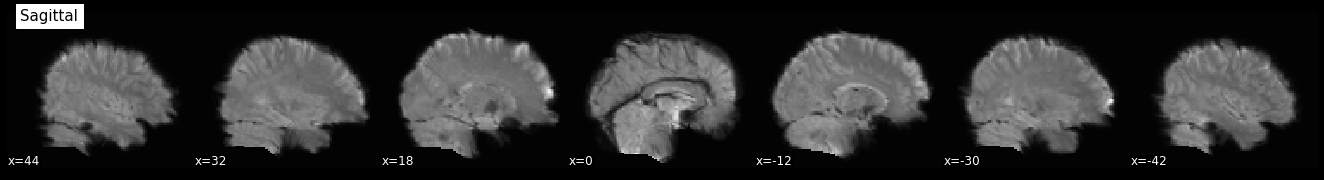

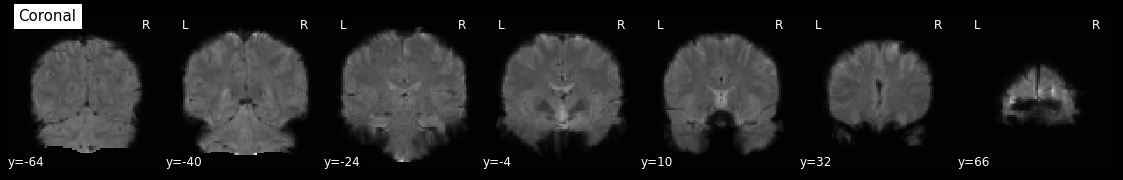

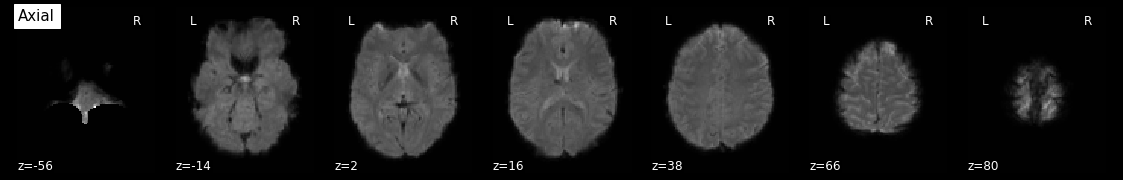

In [26]:
from nilearn import plotting
import nibabel as nib

fmri_file_path = 'pulled-data-MRI/subject-0001/mri_movietask_1/filtered_func_data_clean_MNI.nii.gz'

try:
    fmri_img = nib.load(fmri_file_path)
except Exception as e:
    print(f"Error loading the image: {e}")
    exit(1)

plotting.plot_epi(fmri_img.slicer[..., 0], cmap='gray', title='Sagittal', display_mode='x')
plotting.plot_epi(fmri_img.slicer[..., 0], display_mode='y', cmap='gray', title='Coronal')
plotting.plot_epi(fmri_img.slicer[..., 0], display_mode='z', cmap='gray', title='Axial')

plotting.show()

## Spatial smoothing

In [35]:
# List of mfMRI data files
#fmri_files = file_list_incomplete
fmri_files = ['pulled-data-MRI/subject-0001/mri_movietask_1/filtered_func_data_clean_MNI.nii.gz']

# FWHM value (millimeters)
fwhm = 8

# Specify the output directory
#output_dir = 'analysis/smoothed'
output_dir = f'analysis/smooth_test_{fwhm}mm'

# Create output_dir if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for fmri_file in fmri_files:
    # Load fMRI data
    fmri_img = nib.load(fmri_file)

    # Apply spatial smoothing (about 1 minute per image)
    smooth_fmri_img = image.smooth_img(fmri_img, fwhm)

    # Get filename and directory from filepath
    filename = os.path.basename(fmri_file)
    directory = os.path.dirname(fmri_file)

    # Set output filepath
    output_file = os.path.join(output_dir, directory, 'smoothed_' + filename)

    # Create directory path if it doesn't exist
    if not os.path.exists(os.path.dirname(output_file)):
        os.makedirs(os.path.dirname(output_file))

    # Save smoothed data to output_dir
    nib.save(smooth_fmri_img, output_file)

### If the process times out and stops prematurely, then check which subject sub-directories already have the required smoothed data file

In [11]:
data_dir = 'analysis/smoothed/pulled-data-MRI/'

# Create list of all subject sessions that have been smoothed
file_list_completed = glob.glob(os.path.join(data_dir, 'subject-*/mri_movietask_*/smoothed_filtered_func_data_clean_MNI.nii.gz'))

file_list_updated = []

for filename in file_list_completed:
    new_filename = filename.replace("smoothed_filtered_func_data_clean_MNI.nii.gz", "filtered_func_data_clean_MNI.nii.gz")
    file_list_updated.append(new_filename)
    
def remove_components(filepaths):
    new_filepaths = []
    for filepath in filepaths:
        components = filepath.split(os.sep)
        new_filepath = os.sep.join(components[2:])
        new_filepaths.append(new_filepath)
    return new_filepaths

file_list_updated = remove_components(file_list_updated)

print("Number of images that have been smoothed:", len(file_list))

for file in file_list_updated:
    print(file)

The number of images that have been smoothed: 659
pulled-data-MRI/subject-0126/mri_movietask_2/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0126/mri_movietask_3/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0201/mri_movietask_1/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0201/mri_movietask_2/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0201/mri_movietask_3/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0139/mri_movietask_3/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0139/mri_movietask_1/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0139/mri_movietask_2/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0186/mri_movietask_1/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0186/mri_movietask_2/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0186/mri_movietask_3/filtered_func_data_clean_MNI.nii.gz
pulled-data-MRI/subject-0116/mri_movietask_2/filtered_func_

### Remove filepaths from the list that have already been analyzed, creating a new smaller file list of incompletes

In [13]:
# Convert the lists to sets in order to subtract
file_set = set(file_list) # list of images to be smoothed
completed_set = set(file_list_updated) # list of images already smoothed

# Remove completed files from the original set
incomplete_set = file_set - completed_set

# Convert updated set back to a list
file_list_incomplete = list(incomplete_set)

# Print the updated list
print("Number of images that still have to be smoothed:", len(file_list_incomplete))
for file in file_list_incomplete:
    print(file)

Number of images that still have to be smoothed: 0


#### If necessary, run the script again but with 'file_list_incomplete' so that fmri_files = file_list_incomplete

### View one of the smoothed images

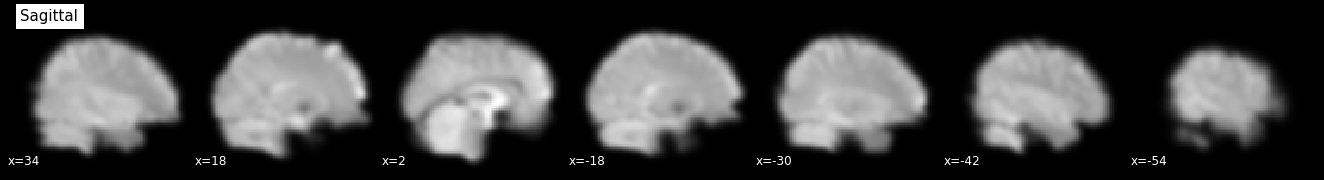

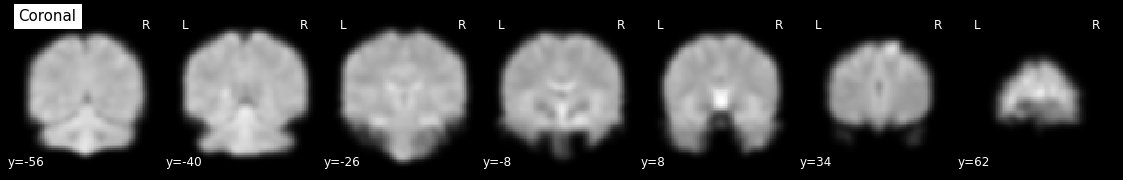

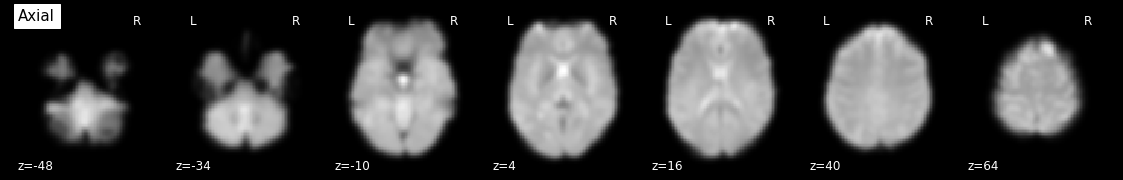

In [43]:
from nilearn import plotting
import nibabel as nib

fmri_file_path = 'analysis/smooth_test_8mm/pulled-data-MRI/subject-0001/mri_movietask_1/smoothed_filtered_func_data_clean_MNI.nii.gz'

try:
    fmri_img = nib.load(fmri_file_path)
except Exception as e:
    print(f"Error loading the image: {e}")
    exit(1)

plotting.plot_epi(fmri_img.slicer[..., 0], cmap='gray', title='Sagittal', display_mode='x')
plotting.plot_epi(fmri_img.slicer[..., 0], display_mode='y', cmap='gray', title='Coronal')
plotting.plot_epi(fmri_img.slicer[..., 0], display_mode='z', cmap='gray', title='Axial')

plotting.show()

2 mm filter: almost no visual difference from unsmoothed image
4 mm filter: some smoothing 
6 mm filter: smooth 
8 mm filter: too smooth; can barely delineate cortex